In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
px = 15
py = 30
#c = 6
c = px*py
t = 30
Ly = 1
Lx = 10
N = (px - 2)*(py - 2)
M_4x = px - 1
M_4y = py - 1
M = 2* M_4x + 2* M_4y
a=2
b=1

In [3]:
def euclidian_distance(x,y,xyk,c):
    matrix = np.zeros([len(x)*len(y) ,c])
    number_matrix = np.zeros([len(x)*len(y),2])
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i
            m = j + i*len(y)
            matrix[m,:] = np.sqrt(np.square(x[n]- xyk[:,0])  + np.square(y[j] - xyk[:,1])) + (2.2250738585072014e-308)**(1/(2*a))
            number_matrix[m,0] = x[n]
            number_matrix[m,1] = y[j]
    return matrix, number_matrix

def points(x,y):
    matrix = np.zeros([len(x)*len(y),2])
    boundary = np.zeros([4*len(y)-4,2])
    interior = np.zeros([(len(x) - 2) * (len(y)-2),2])
    h, u = 0,0
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i#%len(x)
            m = j + i*len(y)
            matrix[m,0] = x[n]
            matrix[m,1] = y[j]
        
            if n == 0 or n == len(x)-1 or j == 0 or j == len(y)-1:
                
                boundary[h,0] = x[n]
                boundary[h,1] = y[j]
                h+=1
            else:
                interior[u,0] = x[n]
            
                interior[u,1] = y[j]
                u+=1
    return matrix, boundary, interior

In [4]:
x = np.linspace(0,Lx,px)
y = np.linspace(0,Ly,py)

X,Y = np.meshgrid(x,y)

#Puntos internos

x_int = x[1:-1]
y_int = y[1:-1]
Xin,Yin = np.meshgrid(x_int,y_int)

#Puntos en las fronteras:
xf1, yf1 = (x, np.zeros(1)) # f(x,0) 
X1,Y1 = np.meshgrid(xf1 , yf1)
xf2,yf2 = (x, np.ones(1)*Ly) # f(x,L)
X2,Y2 = np.meshgrid(xf2 , yf2)
xf3,yf3 = (np.zeros(1), y_int ) #f(0,y)
X3,Y3 = np.meshgrid(xf3 , yf3)
xf4,yf4 = (np.ones(1)*Lx,y_int) #f(L,y)
X4,Y4 = np.meshgrid(xf4,yf4)

#Centros
x_c = np.linspace(0,Lx,px)
y_c = np.linspace(0,Ly,py)

xk = points(x_c,y_c)[0][:,0].reshape(-1,1)
yk = points(x_c,y_c)[0][:,1].reshape(-1,1)
#c = len(x_int)
xyk1 = np.concatenate((xk,yk),axis = 1)

#Puntos test
x_test = np.linspace(0,Lx,t)
y_test = np.linspace(0,Ly,t)
Xt,Yt = np.meshgrid(x_test,y_test)
x_vector = points(x,y)[0][:,0].reshape(-1,1)
y_vector = points(x,y)[0][:,1].reshape(-1,1)
x_vector.shape
x_v2 = euclidian_distance(x,y,xyk1,c)[1][:,0].reshape(-1,1)
x_v2.shape

(450, 1)

In [5]:
def tps_rbf(euclidian_distance,a=a,b=b):
    #if euclidian_distance == 0:
    #    return 0
    #else:
    return (euclidian_distance*b)**(2*a) *np.log(b*euclidian_distance) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdx(x_vector,euclidian_distance,a=a,b=b):
        return (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance * (b)**(2*a) *2*a*euclidian_distance**(2*a-1)*(np.log(b*euclidian_distance) + 1)# #euclidian_distance + 1e-10 to avoid singularity at zero  
    
def tpsdy(y_vector,euclidian_distance,a=a,b=b):
        return (b)**(2*a) *(2*a*euclidian_distance**(2*a-1)*np.log(b*euclidian_distance) + b*euclidian_distance**(2*a) /(b*euclidian_distance)) * (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1)) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdxx(x_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *2*a*euclidian_distance**(2*a-1)*(np.log(b*euclidian_distance) + 1)
                        + ((x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) ) +2*a))
def tpsdyy(y_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *2*a*euclidian_distance**(2*a-1)*(np.log(b*euclidian_distance) + 1)
                        + ((y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) ) +2*a))

In [6]:
euclidian_dist_complete = euclidian_distance(x,y,xyk1,c)[0]
euclidian_dist_int = euclidian_distance(x_int,y_int,xyk1,c)[0]

euclidian_dist_border1 = euclidian_distance(xf1,yf1,xyk1,c)[0]
euclidian_dist_border2 = euclidian_distance(xf2,yf2,xyk1,c)[0]
euclidian_dist_border3 = euclidian_distance(xf3,yf3,xyk1,c)[0]
euclidian_dist_border4 = euclidian_distance(xf4,yf4,xyk1,c)[0]

In [7]:
x_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,0]
y_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,1]
euclidian_dist_border3.shape

(28, 450)

In [8]:
tps_rbf(euclidian_dist_int)
tpsdx(x_vector,euclidian_dist_complete).shape
tpsdy(y_int,euclidian_dist_border3).shape
tpsdxx(x,euclidian_dist_border1).shape
#tpsdyy(y_vector,ed).shape

(15, 450)

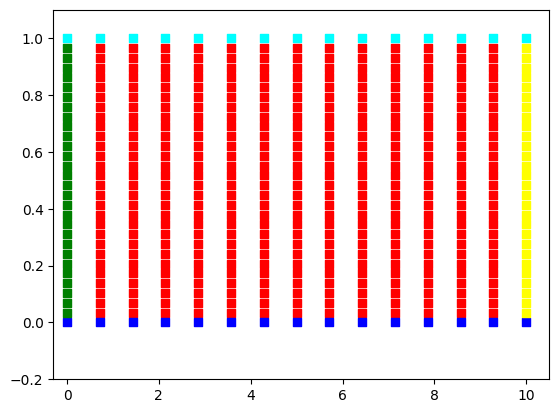

In [9]:
#Plot the colocation points
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-0.3,Lx*1.05])
ax.set_ylim([-0.2,Ly*1.1])
ax.scatter(Xin,Yin,marker='s', color='red')
ax.scatter(X1,Y1,marker='s', color = 'blue')

ax.scatter(X2,Y2,marker='s', color = 'cyan')
ax.scatter(X3,Y3,marker='s', color = 'green')
ax.scatter(X4,Y4,marker = 's' ,color = 'yellow')
#ax.scatter(XC,YC, color = 'black')
plt.show()

In [10]:
gxx_int = (tpsdxx(x_vector_int,euclidian_dist_int)) 
gyy_int =  (tpsdyy(y_vector_int,euclidian_dist_int)) 
gx_int = (tpsdx(x_vector_int,euclidian_dist_int)) 
gy_int = tpsdy(y_vector_int,euclidian_dist_int)
g_int = tps_rbf(euclidian_dist_int)
gx_b4 = tpsdx(np.ones_like(y_int)*Lx,euclidian_dist_border4 )
gy_b4 = tpsdy(y_int,euclidian_dist_border4)
gxx_b4 = tpsdxx(np.ones_like(y_int)*Lx,euclidian_dist_border4)
gyy_b4 = tpsdyy(y_int,euclidian_dist_border4)
gb2 = tps_rbf(euclidian_dist_border2)
gb3 = tps_rbf(euclidian_dist_border3)
gxx_b3 = tpsdxx(np.zeros_like(y_int),euclidian_dist_border3)
gyy_b3 = tpsdyy(y_int,euclidian_dist_border3)
gx_b3 = tpsdx(np.zeros_like(y_int),euclidian_dist_border3)
gy_b3 = tpsdy(y_int,euclidian_dist_border3)

gb1 = tps_rbf(euclidian_dist_border1)

In [11]:
weights = np.random.rand(2*px*py,1)
wx = weights[:N+M].reshape(-1,1)
wy = weights[N+M:].reshape(-1,1)

In [12]:
#-np.dot(gxx_int,wx) - np.dot(gyy_int,wx) #-20

In [13]:

def stationary_navier_stokes(weights):
        
    wx = weights[:N+M].reshape(-1,1)
    wy = weights[N+M:].reshape(-1,1)
    
    F = np.zeros(((3*N+4*(M_4x+1) + 6*(M_4y-1)),))
    
    
    F[0:N] =  ( -np.dot(gxx_int,wx) - np.dot(gyy_int,wx) - 10).flatten()
    
    F[N:2*N] = (-np.dot(gxx_int,wy) - np.dot(gyy_int,wy)).flatten() 
    F[2*N:3*N] = (np.dot(gx_int,wx) + np.dot(gy_int,wy)).flatten()
    

    F[3*N+4*(M_4x+1) : 3*N+4*(M_4x+1) +1*(M_4y-1) ] = ( -np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx)-10 ).flatten()
    F[3*N+4*(M_4x+1) +1*(M_4y-1) : 3*N+4*(M_4x+1) + 2*(M_4y-1) ] = ( -np.dot(gxx_b3,wx) - np.dot(gyy_b3,wx) -10).flatten()
    F[ 3*N+4*(M_4x+1) + 2*(M_4y-1):  3*N+4*(M_4x+1) + 3*(M_4y-1)] = (np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()
    F[3*N+4*(M_4x+1) + 3*(M_4y-1): 3*N+4*(M_4x+1) + 4*(M_4y-1)] = (np.dot(gx_b3,wx) + np.dot(gy_b3,wy)).flatten()
    #F[3*N :3*N + (M_4 - 1)] = (np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()
    F[3*N+4*(M_4x+1) + 4*(M_4y-1): 3*N + 4*(M_4x+1) + 5*(M_4y-1)] = ( -np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy)).flatten()
    F[3*N + 4*(M_4x+1) + 5*(M_4y-1): 3*N + 4*(M_4x+1) + 6*(M_4y-1)] = ( -np.dot(gxx_b3,wy) - np.dot(gyy_b3,wy)).flatten()
    
    F[3*N  : 3*N +  M_4x + 1] = ( np.dot( gb2 , wx ) ).flatten()
    F[3*N + ( M_4x + 1 ): 3*N + 2 * ( M_4x + 1 )] = (np.dot(gb1,wx)).flatten()
    
    #F[3*N + 2*(M_4 - 1) + 2*(M_4 + 1):3*N + 3*(M_4 - 1) + 2*(M_4 + 1)] = (np.dot(gb3,wy)).flatten()
    F[3*N + 2 * ( M_4x + 1 ):3*N + 3 * ( M_4x + 1 )] = (np.dot(gb2,wy)).flatten()
    F[3*N + 3 * ( M_4x + 1 ):3*N + 4 * ( M_4x + 1 )] = (np.dot(gb1,wy)).flatten()
    #F[3*N + 1*(M_4 - 1)+ 4*(M_4 + 1):3*N + 2*(M_4 - 1)+ 4*(M_4 + 1)] = np.dot(gx_b4,wy).flatten()
    
    #F[3*N + 2*(M_4 - 1)+ 4*(M_4 + 1):3*N + 3*(M_4 - 1)+ 4*(M_4 + 1)] = ( -np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx) - 10).flatten()
    #F[3*N + 5*(M_4 - 1)+ 4*(M_4 + 1):3*N + 5*(M_4 - 1)+ 5*(M_4 + 1)] = ( -np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy)).flatten()
    
    
    return F#,F.shape
    
    

In [14]:
stationary_navier_stokes(weights)[-1]

-320295.927363355

In [15]:
from scipy.optimize import least_squares

# Define el vector inicial
x0 = (weights.reshape(-1) ) # tamaño_total = tamaño del vector weights
print(stationary_navier_stokes(weights).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado = least_squares(stationary_navier_stokes, x0, method='lm') 

True


In [16]:
resultado.success

True

In [17]:
resultado

 active_mask: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

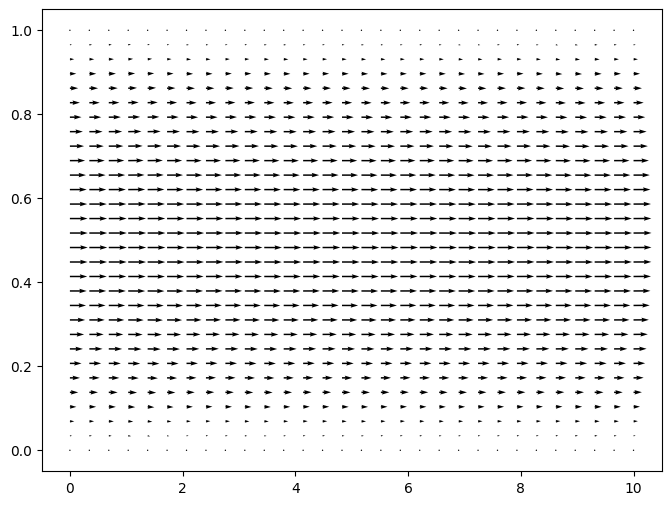

In [18]:
# Plot quiver 
euclidian_dist_test = euclidian_distance(x_test,y_test,xyk1,c)[0]
ux = tps_rbf(euclidian_dist_test) @ resultado.x[:N+M]
uy = tps_rbf(euclidian_dist_test) @ resultado.x[N+M:]

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xt, Yt, ux.reshape(t,t).T, uy.reshape(t,t).T)

1.2713165734749055
1.271456751601363


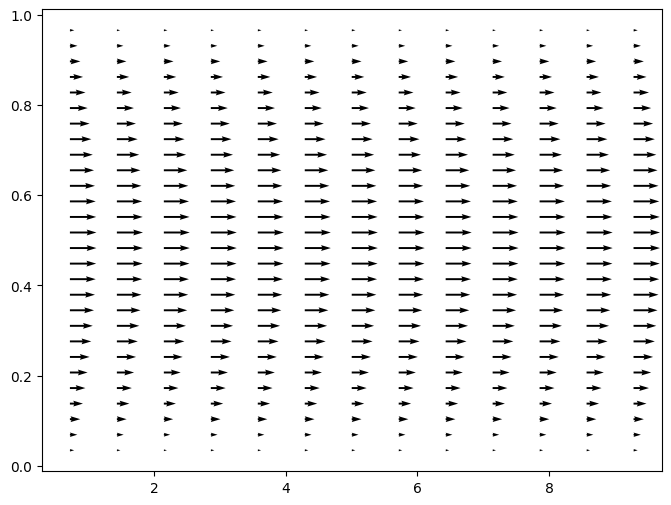

In [19]:
print(np.max(ux))
print(np.max(tps_rbf(euclidian_dist_int) @ resultado.x[:N+M]))
u_int =tps_rbf(euclidian_dist_int) @ resultado.x[:N+M]
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xin, Yin, u_int.reshape(px-2,py-2).T, np.zeros_like(u_int.reshape(px-2,py-2)) )

Error: 0.6626471973645324 %


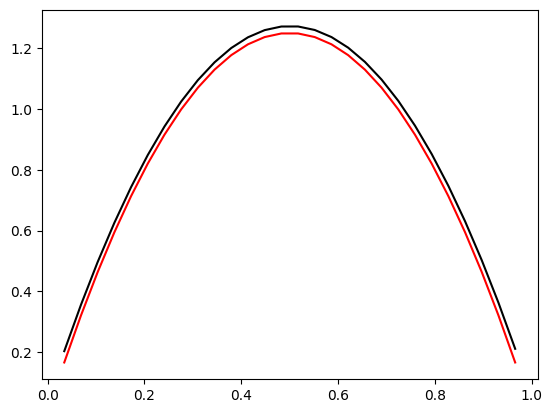

In [20]:
print("Error:" ,np.mean( ((u_int.reshape(px-2,py-2).T[:,0] - -5*(y_int**2 - Ly*y_int))/(-5*(y_int**2 - Ly*y_int)))**2 )*100,'%')
plt.plot(y_int,u_int.reshape(px-2,py-2).T[:,0],color = 'black')
plt.plot(y_int, -5*(y_int**2 - Ly*y_int),color = 'red')


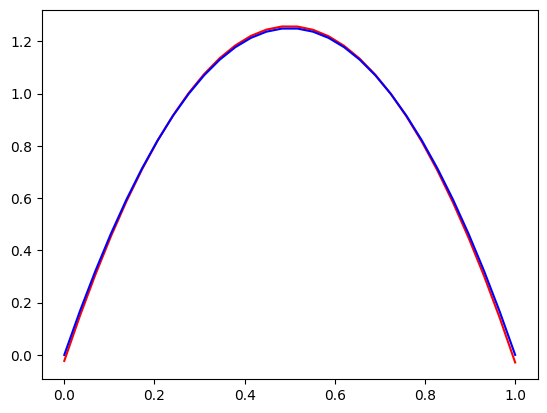

In [21]:

plt.plot(y_test,ux.reshape(t,t).T[:,0], color = 'red')
plt.plot(y_test,-5*(y_test**2 - Ly*y_test), color = 'blue')

In [22]:
gxx_int = (tpsdxx(x_vector_int,euclidian_dist_int)) 
gyy_int =  (tpsdyy(y_vector_int,euclidian_dist_int)) 
gx_int = (tpsdx(x_vector_int,euclidian_dist_int)) 
gy_int = tpsdy(y_vector_int,euclidian_dist_int)
g_int = tps_rbf(euclidian_dist_int)
gx_b4 = tpsdx(np.ones_like(y_int)*Lx,euclidian_dist_border4 )
gy_b4 = tpsdy(y_int,euclidian_dist_border4)
gxx_b4 = tpsdxx(np.ones_like(y_int)*Lx,euclidian_dist_border4)
gyy_b4 = tpsdyy(y_int,euclidian_dist_border4)
gb2 = tps_rbf(euclidian_dist_border2)
gb3 = tps_rbf(euclidian_dist_border3)
gxx_b3 = tpsdxx(np.zeros_like(y_int),euclidian_dist_border3)
gyy_b3 = tpsdyy(y_int,euclidian_dist_border3)
gx_b3 = tpsdx(np.zeros_like(y_int),euclidian_dist_border3)
gy_b3 = tpsdy(y_int,euclidian_dist_border3)

gb1 = tps_rbf(euclidian_dist_border1)
gb4 = tps_rbf(euclidian_dist_border4)

In [23]:
phidphidx = np.array([ g_int[:,i] * gx_int[:,j] for i in range(g_int.shape[1]) for j in range(gx_int.shape[1])]  ).T
phidphidy = np.array([g_int[:,i] * gy_int[:,j] for i in range(g_int.shape[1]) for j in range(gy_int.shape[1])] ).T

phidphidx_b3 = np.array([ gb3[:,i] * gx_b3[:,j] for i in range(gxx_b3.shape[1]) for j in range(gx_b3.shape[1])]  ).T
phidphidx_b4 = np.array([ gb4[:,i] * gx_b4[:,j] for i in range(gxx_b4.shape[1]) for j in range(gx_b4.shape[1])]  ).T
phidphidy_b3 = np.array([ gb3[:,i] * gy_b3[:,j] for i in range(gxx_b3.shape[1]) for j in range(gy_b3.shape[1])]  ).T
phidphidy_b4 = np.array([ gb4[:,i] * gy_b4[:,j] for i in range(gxx_b4.shape[1]) for j in range(gy_b4.shape[1])]  ).T

#phidphidy_b4.shape


In [24]:

def NavierStokess(weights):
        
    wx = weights[:N+M].reshape(-1,1)
    wy = weights[N+M:].reshape(-1,1)
    wxiwxj = np.array([ wx[i]*wx[j] for i in range(len(wx)) for j in range(len(wy))])
    wyiwyj = np.array([ wy[i]*wy[j] for i in range(len(wx)) for j in range(len(wy))])
    wxiwyj = np.array([ wx[i]*wy[j] for i in range(len(wx)) for j in range(len(wy))])
    wyiwxj = np.array([ wy[i]*wx[j] for i in range(len(wx)) for j in range(len(wy))])
    #weights = np.concatenate((wx,wxiwxj,wyiwxj,wy,wxiwyj,wyiwyj),axis = 0)
    
    
    F = np.zeros(((3*N+4*(M_4x+1) + 6*(M_4y-1)),))
    #Ecuaiones diferenciales en puntos internos
        #Ecuacion en x
    F[0:N] +=  ( -np.dot(gxx_int,wx) - np.dot(gyy_int,wx) - 10 + np.dot(phidphidx,wxiwxj) + np.dot(phidphidy,wyiwxj)).flatten()
        #   Ecuacione en y
    F[N:2*N] += (-np.dot(gxx_int,wy) - np.dot(gyy_int,wy) + np.dot(phidphidx,wxiwyj) + np.dot(phidphidy,wyiwyj)).flatten() 
        #Ecuacion de continuidad
    F[2*N:3*N] += (np.dot(gx_int,wx) + np.dot(gy_int,wy)).flatten()
    
    #Condiciones de frontera
    
        # Condiciones de ux
    F[3*N  : 3*N +  M_4x + 1] = ( np.dot( gb2 , wx ) ).flatten()
    F[3*N + ( M_4x + 1 ): 3*N + 2 * ( M_4x + 1 )] = (np.dot(gb1,wx)).flatten()
    
        #Condiciones de uy
    F[3*N + 2 * ( M_4x + 1 ):3*N + 3 * ( M_4x + 1 )] = (np.dot(gb2,wy)).flatten()
    F[3*N + 3 * ( M_4x + 1 ):3*N + 4 * ( M_4x + 1 )] = (np.dot(gb1,wy)).flatten()
    
    #Ecuaciones diferenciales en las fronteras
        #Ecuaciones de x 
    F[3*N+4*(M_4x+1) : 3*N+4*(M_4x+1) +1*(M_4y-1) ] = ( -np.dot(gxx_b3,wx) - np.dot(gyy_b3,wx) - 10 + np.dot(phidphidx_b3,wxiwxj) + np.dot(phidphidy_b3,wyiwxj)).flatten()
    F[3*N+4*(M_4x+1) +1*(M_4y-1) : 3*N+4*(M_4x+1) + 2*(M_4y-1) ] = ( -np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx) - 10 + np.dot(phidphidx_b4,wxiwxj) + np.dot(phidphidy_b4,wyiwxj)).flatten()
        #Ecuacion de continuidad
    F[ 3*N+4*(M_4x+1) + 2*(M_4y-1):  3*N+4*(M_4x+1) + 3*(M_4y-1)] = (np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()
    F[3*N+4*(M_4x+1) + 3*(M_4y-1): 3*N+4*(M_4x+1) + 4*(M_4y-1)] = (np.dot(gx_b3,wx) + np.dot(gy_b3,wy)).flatten()
        #Ecuaciones en y
    F[3*N+4*(M_4x+1) + 4*(M_4y-1): 3*N + 4*(M_4x+1) + 5*(M_4y-1)] = (-np.dot(gxx_b3,wy) - np.dot(gyy_b3,wy) + np.dot(phidphidx_b3,wxiwyj) + np.dot(phidphidy_b3,wyiwyj)).flatten()
    F[3*N + 4*(M_4x+1) + 5*(M_4y-1): 3*N + 4*(M_4x+1) + 6*(M_4y-1)] = (-np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy) + np.dot(phidphidx_b4,wxiwyj) + np.dot(phidphidy_b4,wyiwyj)).flatten()  
    
    return F#,F.shape
    
    

In [25]:
NavierStokess(weights)[-1]

1066323821494.3206

In [ ]:
from scipy.optimize import least_squares

# Define el vector inicial
x0 = (weights.reshape(-1) ) # tamaño_total = tamaño del vector weights
print( NavierStokess(weights).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado2 = least_squares(NavierStokess, x0, method='lm') 

True


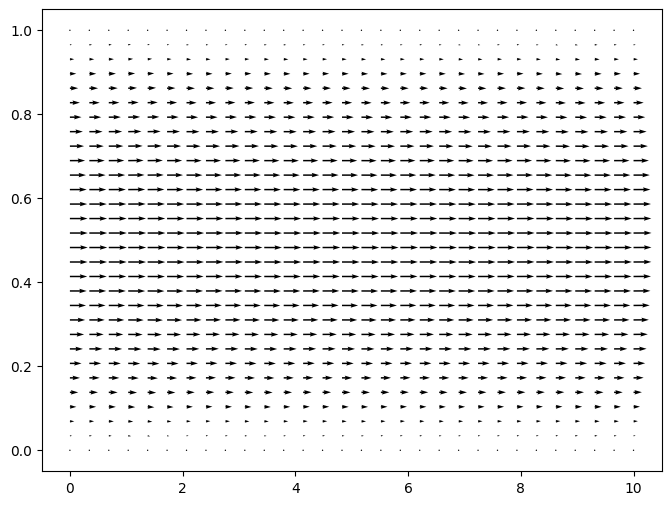

In [27]:
# Plot quiver 
euclidian_dist_test = euclidian_distance(x_test,y_test,xyk1,c)[0]
ux2 = tps_rbf(euclidian_dist_test) @ resultado2.x[:N+M]
uy2 = tps_rbf(euclidian_dist_test) @ resultado2.x[N+M:]

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xt, Yt, ux2.reshape(t,t).T, uy2.reshape(t,t).T)

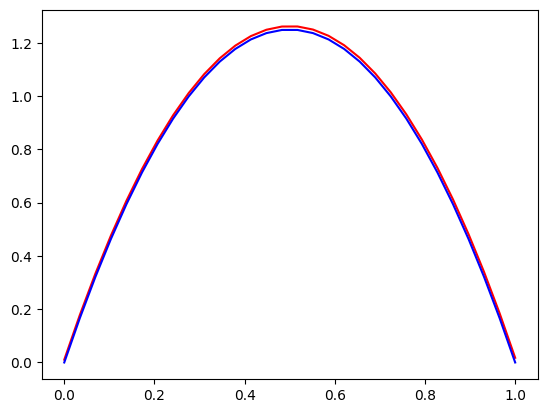

In [28]:

plt.plot(y_test,ux2.reshape(t,t).T[:,-2], color = 'red')
plt.plot(y_test,-5*(y_test**2 - Ly*y_test), color = 'blue')